In [43]:
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl

In [44]:
weather_dataset = pd.read_csv('wwo_normalized_manila\\worldweatheronline_normalized_manila_2015_1day.csv', index_col=[0], parse_dates=[0], skipinitialspace=True)

# Using All Weather Variables

In [45]:
# Remove unused columns and reorder 
weather_dataset = weather_dataset[['precipMM', 'tempC', 'windspeedKmph', 'cond', 'humidity', 'visibility', 'pressure', 'cloudcover', 'dewPointC', 'windGustKmph']]

In [46]:
# In order to do multiple regression we need to add a column of 1s for x0
x = weather_dataset.loc[:, weather_dataset.columns != 'precipMM'].values.tolist()
x = np.array([np.concatenate((v,[1])) for v in x])

# independent variable
y = weather_dataset['precipMM']

## Multiple Linear Regression using train_test_split

In [47]:
# Splitting training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.33, shuffle=False)

# Create linear regression object
linreg = LinearRegression()

# Train the model using the training sets
linreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [48]:
p = linreg.predict(X_test)

# Compute RMSE and r2_score on training data
r2score_train = r2_score(Y_test, p)
rmse_train = np.sqrt(mean_squared_error(Y_test, p))

print("R2 score", r2score_train)
print("RMSE", rmse_train)

R2 score 0.823714531163
RMSE 0.0277858916002


In [49]:
# We can view the regression coefficients
print( 'Regression Coefficients: \n', linreg.coef_)

Regression Coefficients: 
 [ -9.30979088e-02  -6.71486008e-01   2.89359234e-04  -1.49455500e-01
  -2.22503758e-01   1.78904189e-02  -4.29427697e-03   1.08042103e-01
   9.10152529e-01   0.00000000e+00]


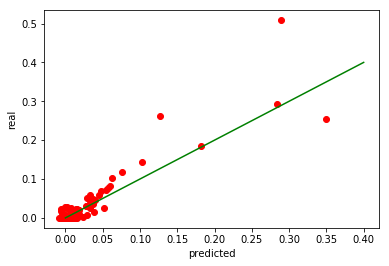

In [50]:
# Plot outputs
%matplotlib inline
fig = pl.figure()
pl.plot(p, Y_test,'ro')
pl.plot([0,0.4],[0,0.4], 'g-')
pl.xlabel('predicted')
pl.ylabel('real')
pl.show()

pl.savefig('wwo_model_results/linear_all_scatterplot.png')

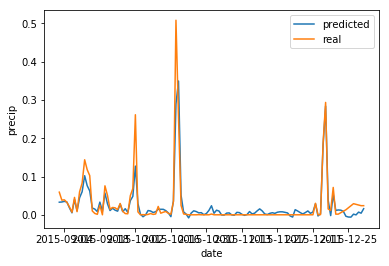

In [51]:
# Plot outputs
%matplotlib inline
fig = pl.figure()
pl.plot(Y_test.index, p, label='predicted')
pl.plot(Y_test.index, Y_test, label='real')
pl.ylabel('precip')
pl.xlabel('date')
pl.legend()
pl.show()

pl.savefig('wwo_model_results/linear_all_linegraph.png')

## Multiple Linear Regression using 10-fold cross validation

In [52]:
# Now let's compute RMSE using 10-fold x-validation
kf = KFold(n_splits=10, shuffle=False, random_state=None)
xval_err = 0
for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    linreg.fit(x_train, y_train)
    p = linreg.predict(x_test)
    e = p-y_test
    xval_err += np.dot(e,e)
    
rmse_10cv = np.sqrt(xval_err/len(x))

In [53]:
method_name = 'Simple Linear Regression'
print('Method: %s' %method_name)
print('R2 score on training: %.6f'  %r2score_train)
print('RMSE on training: %.6f'  %rmse_train)
print('RMSE on 10-fold CV: %.6f'  %rmse_10cv)

Method: Simple Linear Regression
R2 score on training: 0.823715
RMSE on training: 0.027786
RMSE on 10-fold CV: 0.020529


# Using Correlated Weather Variables

In [54]:
# Remove unused columns and reorder 
weather_dataset = weather_dataset[['precipMM', 'cond', 'humidity', 'cloudcover', 'dewPointC']]

In [55]:
# In order to do multiple regression we need to add a column of 1s for x0
x = weather_dataset.loc[:, weather_dataset.columns != 'precipMM'].values.tolist()
x = np.array([np.concatenate((v,[1])) for v in x])

# independent variable
y = weather_dataset['precipMM']

## Multiple Linear Regression using train_test_split

In [56]:
# Splitting training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.33, shuffle=False)

# Create linear regression object
linreg = LinearRegression()

# Train the model using the training sets
linreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [57]:
p = linreg.predict(X_test)

# Compute RMSE and r2_score on training data
r2score_train_corr = r2_score(Y_test, p)
rmse_train_corr = np.sqrt(mean_squared_error(Y_test, p))

print("R2 score", r2score_train_corr)
print("RMSE", rmse_train_corr)

R2 score 0.384890644901
RMSE 0.0519029742851


In [58]:
# We can view the regression coefficients
print( 'Regression Coefficients: \n', linreg.coef_)

Regression Coefficients: 
 [-0.00257744  0.10555431  0.10520587  0.06303481  0.        ]


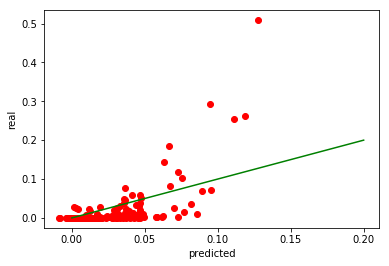

In [59]:
# Plot outputs
%matplotlib inline
pl.plot(p, Y_test,'ro')
pl.plot([0,0.2],[0,0.2], 'g-')
pl.xlabel('predicted')
pl.ylabel('real')
pl.show()

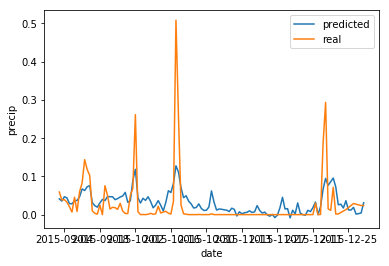

In [61]:
# Plot outputs
%matplotlib inline
pl.plot(Y_test.index, p, label='predicted')
pl.plot(Y_test.index, Y_test, label='real')
pl.ylabel('precip')
pl.xlabel('date')
pl.legend()
pl.show()

## Multiple Linear Regression using 10-fold cross validation

In [41]:
# Now let's compute RMSE using 10-fold x-validation
kf = KFold(n_splits=10, shuffle=False, random_state=None)
xval_err = 0
for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    linreg.fit(x_train, y_train)
    p = linreg.predict(x_test)
    e = p-y_test
    xval_err += np.dot(e,e)
    
rmse_10cv_corr = np.sqrt(xval_err/len(x))

In [42]:
method_name = 'Simple Linear Regression'
print('Method: %s' %method_name)
print('R2 score on training: %.6f'  %r2score_train_corr)
print('RMSE on training: %.6f'  %rmse_train_corr)
print('RMSE on 10-fold CV: %.6f'  %rmse_10cv_corr)

Method: Simple Linear Regression
R2 score on training: 0.384891
RMSE on training: 0.051903
RMSE on 10-fold CV: 0.043960
